In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [65]:
data=pd.read_csv('delivery_time.csv')
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [66]:
#EDA AND DATA VISUALIZATION
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


<Axes: xlabel='Delivery Time', ylabel='Density'>

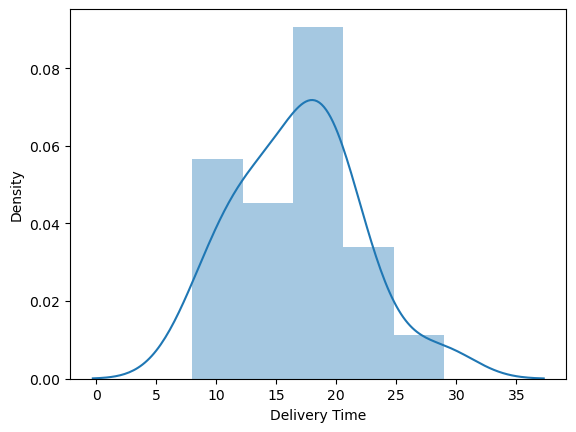

In [67]:
sns.distplot(data['Delivery Time'])

<Axes: xlabel='Sorting Time', ylabel='Density'>

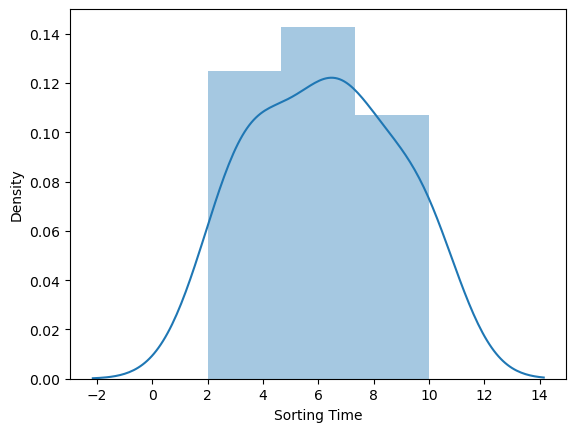

In [68]:
sns.distplot(data['Sorting Time'])

In [73]:
import matplotlib.pyplot as plt

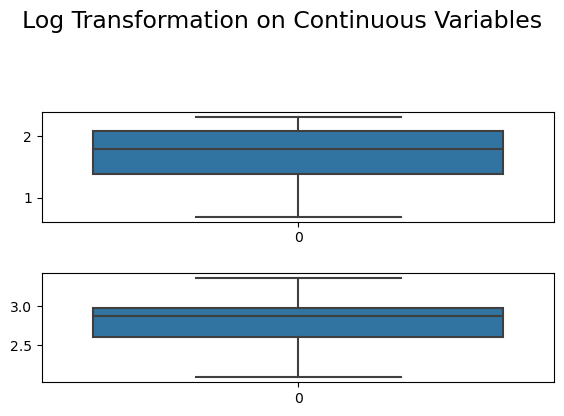

In [80]:

fig, ax=plt.subplots(2, figsize=(6,4), sharex= False, sharey = False)
sns.boxplot(np.log(data['Sorting Time']), ax=ax[0])
sns.boxplot(np.log(data['Delivery Time']), ax=ax[1])
plt.suptitle("Log Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

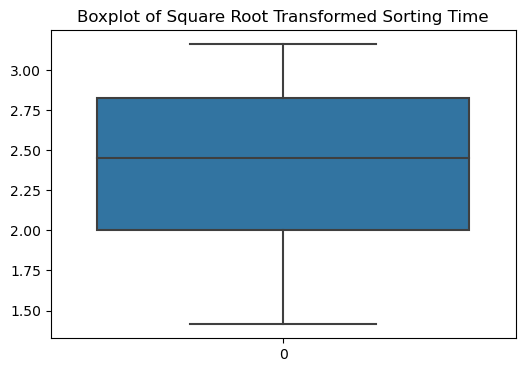

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))  
sns.boxplot(np.sqrt(data['Sorting Time']), ax=ax)
ax.set_title('Boxplot of Square Root Transformed Sorting Time')

plt.show()

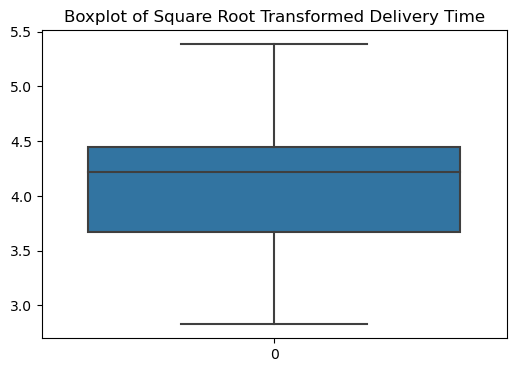

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))  
sns.boxplot(np.sqrt(data['Delivery Time']), ax=ax)
ax.set_title('Boxplot of Square Root Transformed Delivery Time')

plt.show()

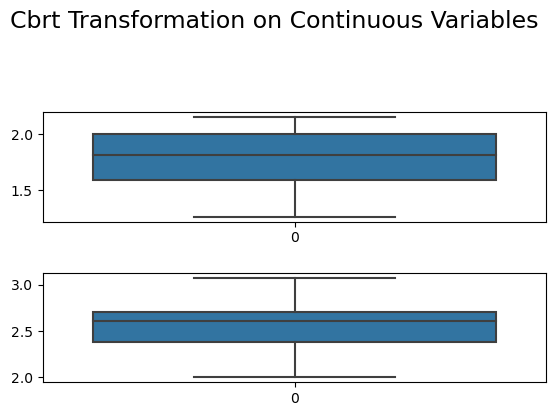

In [81]:
fig, ax=plt.subplots(2, figsize=(6,4), sharex= False, sharey = False)
sns.boxplot(np.cbrt(data['Sorting Time']), ax=ax[0])
sns.boxplot(np.cbrt(data['Delivery Time']), ax=ax[1])
plt.suptitle("Cbrt Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

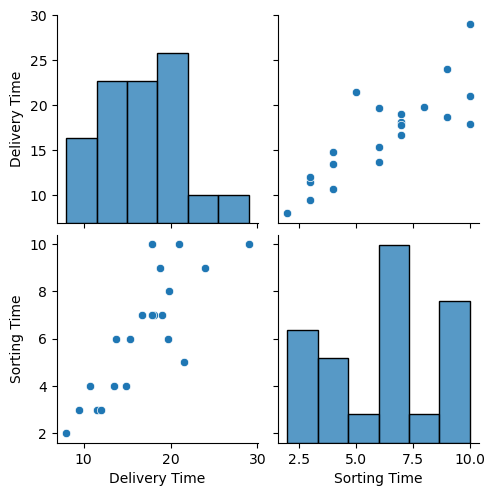

In [82]:
sns.pairplot(data)

In [93]:
#Feature Engineering
data=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [94]:
#correlation analysis
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<Axes: xlabel='sorting_time', ylabel='delivery_time'>

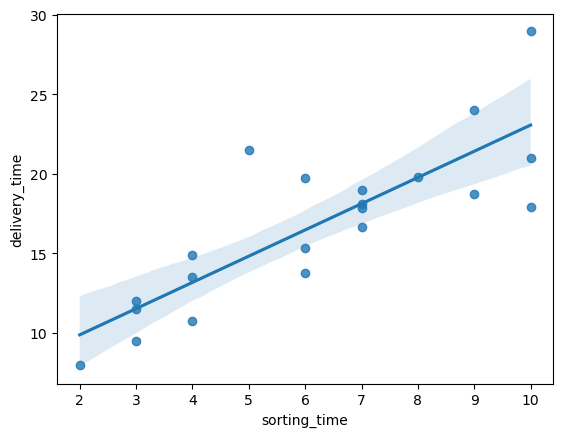

In [95]:
sns.regplot(x=data['sorting_time'],y=data['delivery_time'])


In [102]:
import statsmodels.formula.api as smf
model = smf.ols("delivery_time~sorting_time", data=data).fit()
     

In [105]:
#model parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [106]:
#get t-values & p-values
print(model.tvalues, '\n',model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [107]:
#r squared value
model.rsquared

0.6822714748417231

In [111]:
#Predict Delivery Time for Sorting Time = 5, 10
newdata = pd.Series([5,10])

In [112]:
#PREDICTION
data_pred = pd.DataFrame(newdata, columns = ['sorting_time'])

In [113]:
data_pred

,sorting_time
0,5
1,10


In [115]:
model.predict(data_pred)

0    14.827833
1    23.072933
dtype: float64

In [103]:
#SECOND MODEL
y=data['sorting_time']
y

0     10
1      4
2      6
3      9
4     10
5      6
6      7
7      3
8     10
9      9
10     8
11     4
12     7
13     3
14     3
15     4
16     6
17     7
18     2
19     7
20     5
Name: sorting_time, dtype: int64

In [104]:
data.drop(columns='sorting_time',inplace = True)

In [99]:
#checking for null values
data.isnull().sum()

delivery_time    0
sorting_time     0
dtype: int64

In [30]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.2,random_state=42)

In [7]:
#scaling
scaler=StandardScaler()
for col in x_train:
    x_train[col]= scaler.fit_transform(np.array(x_train[col]).reshape(-1,1))
    x_test[col]=scaler.transform(np.array(x_test[col]).reshape(-1,1))

In [31]:
#model building
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [32]:
lr.coef_#weight learnt from Linear regression mmodel.

array([4.05482483e-17, 1.00000000e+00])

In [10]:
len(lr.coef_) 

1

In [11]:
lr.score(x_train,y_train)

0.7595469743943433

In [12]:
y_pred=lr.predict(x_test)

In [33]:
#model testing
r2_score(y_test,y_pred)

0.404119960471784

In [ ]:
#THE BEST MODEL IS THE FIRST MODEL SINCE THE R SQUARED SCORE IS HIGHER FOR THAT MODEL